In [ ]:
#성비(M/F)를 지도에 시각화

In [ ]:
#필요 : 대여소, 성비, geometry

In [40]:
import pandas as pd
import geopandas as gpd

In [13]:
Bike = pd.read_csv("/Users/yeondu/Downloads/final_final.csv", index_col = 0)
Bike_f = Bike[Bike.성별 == 'F']
Bike_f = Bike_f.append(Bike[Bike.성별 == 'f'])
Bike_m = Bike[Bike.성별 == 'M']
Bike_m = Bike_m.append(Bike[Bike.성별 == 'm'])

/var/folders/4z/mjw5lnr16_j3sgr5pzqr4n6m0000gp/T/ipykernel_13308/1447145301.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Bike_f = Bike_f.append(Bike[Bike.성별 == 'f'])
/var/folders/4z/mjw5lnr16_j3sgr5pzqr4n6m0000gp/T/ipykernel_13308/1447145301.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Bike_m = Bike_m.append(Bike[Bike.성별 == 'm'])


In [28]:
r = Bike_f.groupby(['대여소번호'])['대여소번호'].count()
r = pd.DataFrame(r)
r.rename(columns={'대여소번호':'female'}, inplace = True)
r['대여소'] = r.index
print(r)

       female   대여소
대여소번호              
102      1272   102
103       989   103
104       519   104
105       328   105
106       936   106
...       ...   ...
5851      377  5851
5852       74  5852
5853      230  5853
5854      567  5854
5855      184  5855

[2623 rows x 2 columns]


In [29]:
g = Bike_m.groupby(['대여소번호'])['대여소번호'].count()
g = pd.DataFrame(g)
g.rename(columns={'대여소번호':'male'}, inplace = True)
g['대여소'] = g.index
print(g)

       male   대여소
대여소번호            
102    1350   102
103    1148   103
104     717   104
105     489   105
106    1176   106
...     ...   ...
5851    459  5851
5852    117  5852
5853    683  5853
5854    933  5854
5855    343  5855

[2623 rows x 2 columns]


In [84]:
Ratio = pd.merge(r,g,on='대여소',how='inner')
Ratio['ratio'] = Ratio['male']/Ratio['female']
Ratio = Ratio[['대여소','female','male','ratio']]
Ratio

,대여소,female,male,ratio
0,102,1272,1350,1.061321
1,103,989,1148,1.160768
2,104,519,717,1.381503
3,105,328,489,1.490854
4,106,936,1176,1.256410
...,...,...,...,...
2618,5851,377,459,1.217507
2619,5852,74,117,1.581081
2620,5853,230,683,2.969565
2621,5854,567,933,1.645503


In [86]:
#위도 column추가
def geo(a):
    newcolumn=[]
    for n in a:
        m= Bike[Bike['대여소번호']==n].위도[0]
        newcolumn.append(m)
    return(newcolumn)

Ratio['위도'] = geo(Ratio['대여소'])
#경도 column추가
def geo(a):
    newcolumn=[]
    for n in a:
        m= Bike[Bike['대여소번호']==n].경도[0]
        newcolumn.append(m)
    return(newcolumn)

Ratio['경도'] = geo(Ratio['대여소'])
Ratio

,대여소,female,male,ratio,위도,경도
0,102,1272,1350,1.061321,37.555649,126.910629
1,103,989,1148,1.160768,37.554951,126.910835
2,104,519,717,1.381503,37.550629,126.914986
3,105,328,489,1.490854,37.550007,126.914825
4,106,936,1176,1.256410,37.548645,126.912826
...,...,...,...,...,...,...
2618,5851,377,459,1.217507,37.502083,126.893188
2619,5852,74,117,1.581081,37.503006,126.893829
2620,5853,230,683,2.969565,37.522610,126.923012
2621,5854,567,933,1.645503,37.525089,126.924080


In [74]:
# 한글깨짐 해결
import matplotlib.pyplot as plt

def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "S-Core Dream"
    return font_family
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family라는 변수에 할당합니다.
plt.style.use("ggplot")

font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프에 retina display 적용
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats("retina")

%config InlineBackend.figure_format = 'retina'




/var/folders/4z/mjw5lnr16_j3sgr5pzqr4n6m0000gp/T/ipykernel_13308/2729267179.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='성비(M/F)')


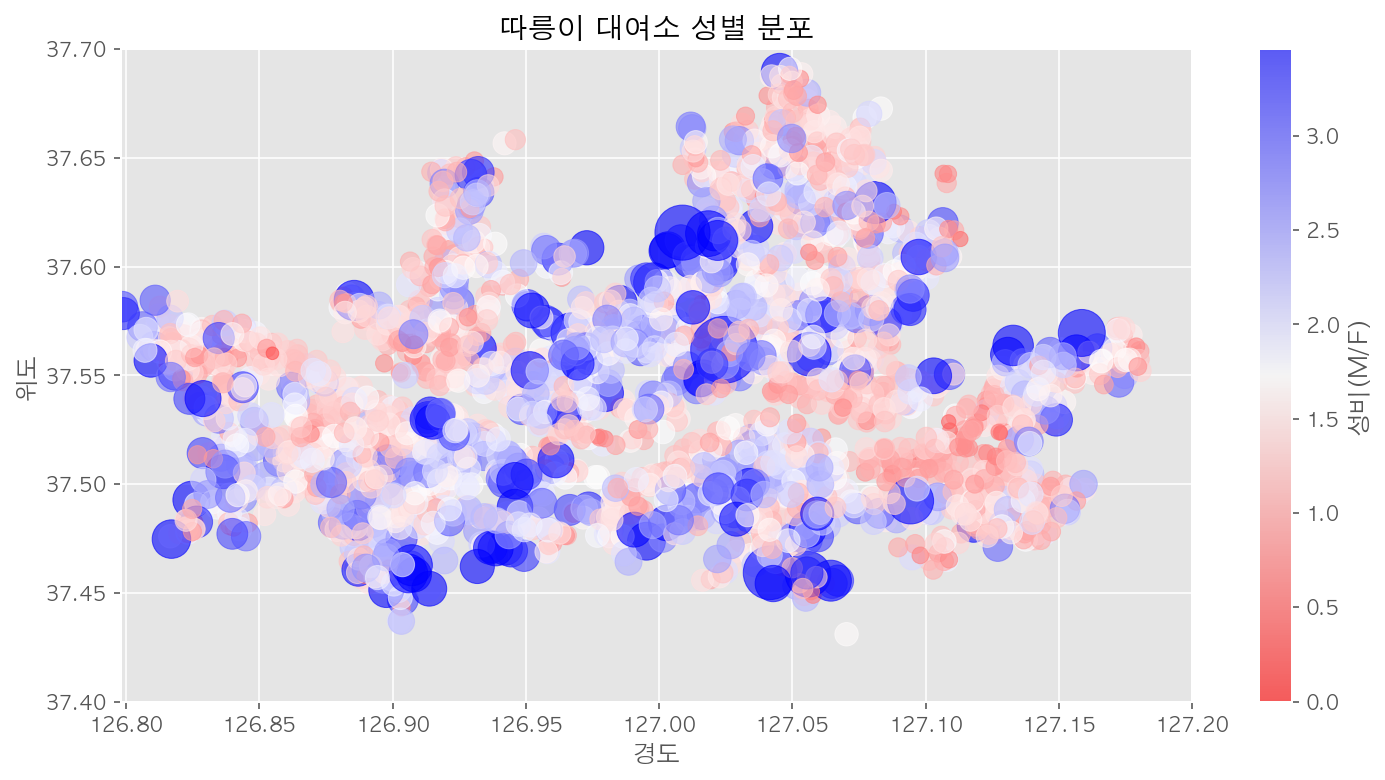

<Figure size 432x288 with 0 Axes>

In [106]:
#대여소별 성비 시각화

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
#k,w = boundary.exterior.xy
#plt.plot(k,w,color='lightgrey')
#x,y = boundary.exterior.xy
#ax.fill(k,w,"lightblue")

#base
x = Ratio['경도']
y = Ratio['위도']
z = Ratio['ratio']
plt.scatter(x, y,s=80*z, c=z, alpha=0.6, vmin=0, vmax=2*(Ratio['ratio'].mean()),
            cmap='bwr_r')
plt.colorbar(label='성비(M/F)')

plt.xlim([126.798000, 127.200000])
plt.ylim([37.400000, 37.700000])


plt.title("따릉이 대여소 성별 분포")
plt.xlabel("경도")
plt.ylabel("위도")


fig = plt.gcf()
plt.show()
plt.draw()
fig.savefig("/Users/yeondu/Documents/project_datacampus/figures//성비분포.png",dpi=300)